# Automotive-Recall-Insights-Trends-Impacts-2000-2025

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Load CSV file into DataFrame
file_path = "Recalls_Data.csv"
df = pd.read_csv(file_path)

# 2. Convert report date to datetime and extract year
df['Report Received Date'] = pd.to_datetime(df['Report Received Date'], errors='coerce')
df['Year'] = df['Report Received Date'].dt.year

# 3. Clean 'Potentially Affected': remove commas, mark 'NR' as missing, convert to numeric
df['Potentially Affected'] = (
    df['Potentially Affected']
      .astype(str)
      .str.replace(',', '')
      .replace('NR (Not Reported)', np.nan)
)
df['Potentially Affected'] = pd.to_numeric(df['Potentially Affected'], errors='coerce')



In [3]:
# 4. Standardize manufacturer names

def clean_manufacturer(name):
    if pd.isna(name):
        return 'Unknown'
    low = name.lower()
    if 'stellantis' in low or 'chrysler' in low or 'fca' in low:
        return 'Stellantis'
    if 'ford' in low:
        return 'Ford'
    if 'hyundai' in low or 'kia' in low:
        return 'Hyundai-Kia Group'
    if 'mercedes' in low or 'daimler' in low:
        return 'Mercedes-Benz Group'
    if 'general motors' in low or 'gm ' in low or 'cadillac' in low:
        return 'General Motors'
    if 'forest river' in low or 'jayco' in low or 'keystone' in low or 'coachmen' in low:
        return 'Forest River Group'
    if 'honda' in low or 'acura' in low:
        return 'Honda Motor Co.'
    if 'volkswagen' in low or 'audi' in low or 'porsche' in low:
        return 'Volkswagen Group'
    if 'volvo' in low or 'mack trucks' in low:
        return 'Volvo Group'
    if 'tesla' in low or 'rivian' in low or 'polestar' in low:
        return 'EV Startups'
    if 'bmw' in low or 'mini' in low:
        return 'BMW Group'
    if 'toyota' in low or 'lexus' in low:
        return 'Toyota Group'
    return name.strip()

df['Manufacturer_Clean'] = df['Manufacturer'].apply(clean_manufacturer)

# 5. Determine vehicle type from subject

def get_vehicle_type(subject):
    if pd.isna(subject):
        return 'Unknown'
    s = subject.lower()
    if 'motorcycle' in s:
        return 'Motorcycle'
    if 'bus' in s:
        return 'Bus'
    if 'truck' in s or 'f-150' in s:
        return 'Truck'
    if 'trailer' in s or 'rv' in s or 'motorhome' in s:
        return 'RV/Trailer'
    if 'suv' in s or 'crossover' in s:
        return 'SUV'
    if 'car' in s or 'sedan' in s:
        return 'Passenger Car'
    if 'ev' in s or 'electric' in s:
        return 'Electric Vehicle'
    return 'Other'

df['Vehicle_Type'] = df['Subject'].apply(get_vehicle_type)


In [4]:
# 6. Flag recalls that are critical (drive or park advisory)
has_drive = df.get('Do Not Drive Advisory') == 'Yes'
has_park = df.get('Park Outside Advisory') == 'Yes'
df['Critical_Recall'] = np.where(has_drive | has_park, 1, 0)

# 7. Categorize issue based on component and description

def get_issue_category(comp, desc):
    if pd.isna(comp) or pd.isna(desc):
        return 'Other'
    c = comp.lower()
    d = desc.lower()
    if 'battery' in d:
        return 'Battery/Fire Risk'
    if 'software' in d or 'update' in d:
        return 'Software/Electrical'
    if 'brake' in c:
        return 'Brake System'
    if 'steering' in c:
        return 'Steering'
    if 'air bag' in c or 'seat belt' in c:
        return 'Safety Restraint'
    if 'fire' in d:
        return 'Fire Risk'
    if 'engine' in c:
        return 'Engine/Powertrain'
    if 'electrical' in c:
        return 'Electrical System'
    return 'Other'

df['Issue_Category'] = df.apply(
    lambda row: get_issue_category(row['Component'], row['Recall Description']),
    axis=1
)

# 8. Copy cleaned data for further use
cleaned_df = df.copy()
print(f"Cleaning complete: {len(cleaned_df)} rows ready.")

Cleaning complete: 29071 rows ready.


In [5]:
cleaned_df.head()

,Report Received Date,NHTSA ID,Recall Link,Manufacturer,Subject,Component,Mfr Campaign Number,Recall Type,Potentially Affected,Recall Description,Consequence Summary,Corrective Action,Park Outside Advisory,Do Not Drive Advisory,Completion Rate % (Blank - Not Reported),Year,Manufacturer_Clean,Vehicle_Type,Critical_Recall,Issue_Category
0,2025-06-05,25V377000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Starcraft RV,Incorrect Safety Chains May Fail,EQUIPMENT,9902634,Vehicle,45,Starcraft RV (Starcraft) is recalling certain ...,Separation of the trailer and tow vehicle incr...,"Dealers will replace the safety chains, free o...",No,No,NaN,2025,Starcraft RV,Other,0,Other
1,2025-06-04,25V374000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Triple E Recreational Vehicles,Wiring May Overheat and Cause Fire,ELECTRICAL SYSTEM,CA#10817-1,Vehicle,467,Triple E Recreational Vehicles (Triple E) is r...,Overheated wiring can cause electrical arcing ...,Dealers will correct the insulation around the...,No,No,NaN,2025,Triple E Recreational Vehicles,Other,0,Electrical System
2,2025-06-04,25V373000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Hyundai Motor America,Incorrect Headlight Aim Label/FMVSS 108,EXTERIOR LIGHTING,279,Vehicle,10409,Hyundai Motor America (Hyundai) is recalling c...,Improperly aimed headlights can result in insu...,Hyundai will mail owners a corrected label wit...,No,No,NaN,2025,Hyundai-Kia Group,Other,0,Other
3,2025-06-04,25V370000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Rivian Automotive, LLC",D-ring Bolts for Seat Belt Anchorage Assemblie...,SEAT BELTS,FSAM-1681,Vehicle,536,"Rivian Automotive, LLC (Rivian) is recalling c...",An improperly secured seat belt may not restra...,Rivian will inspect and properly secure the se...,No,No,NaN,2025,EV Startups,Other,0,Safety Restraint
4,2025-06-03,25V368000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Nova Bus (US) Inc.,Turn Signal Indicators May Remain Illuminated/...,EXTERIOR LIGHTING,CR5732,Vehicle,43,Nova Bus (US) Inc. (Nova Bus) is recalling cer...,"A faulty indictor light, that cannot provide t...",Nova Bus will update the digital display firmw...,No,No,NaN,2025,Nova Bus (US) Inc.,Other,0,Other


In [6]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29071 entries, 0 to 29070
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Report Received Date                      29071 non-null  datetime64[ns]
 1   NHTSA ID                                  29071 non-null  object        
 2   Recall Link                               29071 non-null  object        
 3   Manufacturer                              29071 non-null  object        
 4   Subject                                   29071 non-null  object        
 5   Component                                 21574 non-null  object        
 6   Mfr Campaign Number                       29009 non-null  object        
 7   Recall Type                               29071 non-null  object        
 8   Potentially Affected                      29071 non-null  int64         
 9   Recall Description          

In [7]:
# Set style and default figure size
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)

# ─────── Helpers ───────
def _print_section(title):
    """Print section header"""
    print(f"\n{title.upper()}")

def _print_top(series, label, n=5):
    """Print top N items from series"""
    for idx, val in series.head(n).items():
        print(f"  {idx}: {val:,} {label}")

def _bar(series, ax, title, kind="bar", **kw):
    """Plot a bar chart on given axis"""
    series.plot(kind=kind, ax=ax, **kw)
    ax.set_title(title)
    ax.tick_params(axis="x", rotation=45)

# ─────── Overall Summary ───────
def plot_and_report_overall(df):
    _print_section("overall summary")
    print(f"Total recalls: {len(df):,}")
    print(f"Total vehicles affected: {df['Potentially Affected'].sum():,}")
    print(f"Critical recalls: {df['Critical_Recall'].sum()}")

    _print_section("top 5 manufacturers by recalls")
    _print_top(df["Manufacturer_Clean"].value_counts(), "recalls")

    # Annual trends
    fig, ax = plt.subplots(2, 1, figsize=(14, 12))
    df.groupby("Year").size().plot(marker="o", linewidth=2, ax=ax[0])
    ax[0].set(title="Annual Recall Counts", ylabel="Recalls")

    df.groupby("Year")["Potentially Affected"].sum().plot(kind="bar", ax=ax[1])
    ax[1].set(title="Annual Vehicles Affected", ylabel="Total Affected")

    fig.tight_layout()
    plt.show()




OVERALL SUMMARY
Total recalls: 29,071
Total vehicles affected: 1,318,002,619
Critical recalls: 167

TOP 5 MANUFACTURERS BY RECALLS
  General Motors: 1,691 recalls
  Ford: 1,590 recalls
  Stellantis: 1,469 recalls
  Forest River Group: 1,252 recalls
  Mercedes-Benz Group: 1,217 recalls


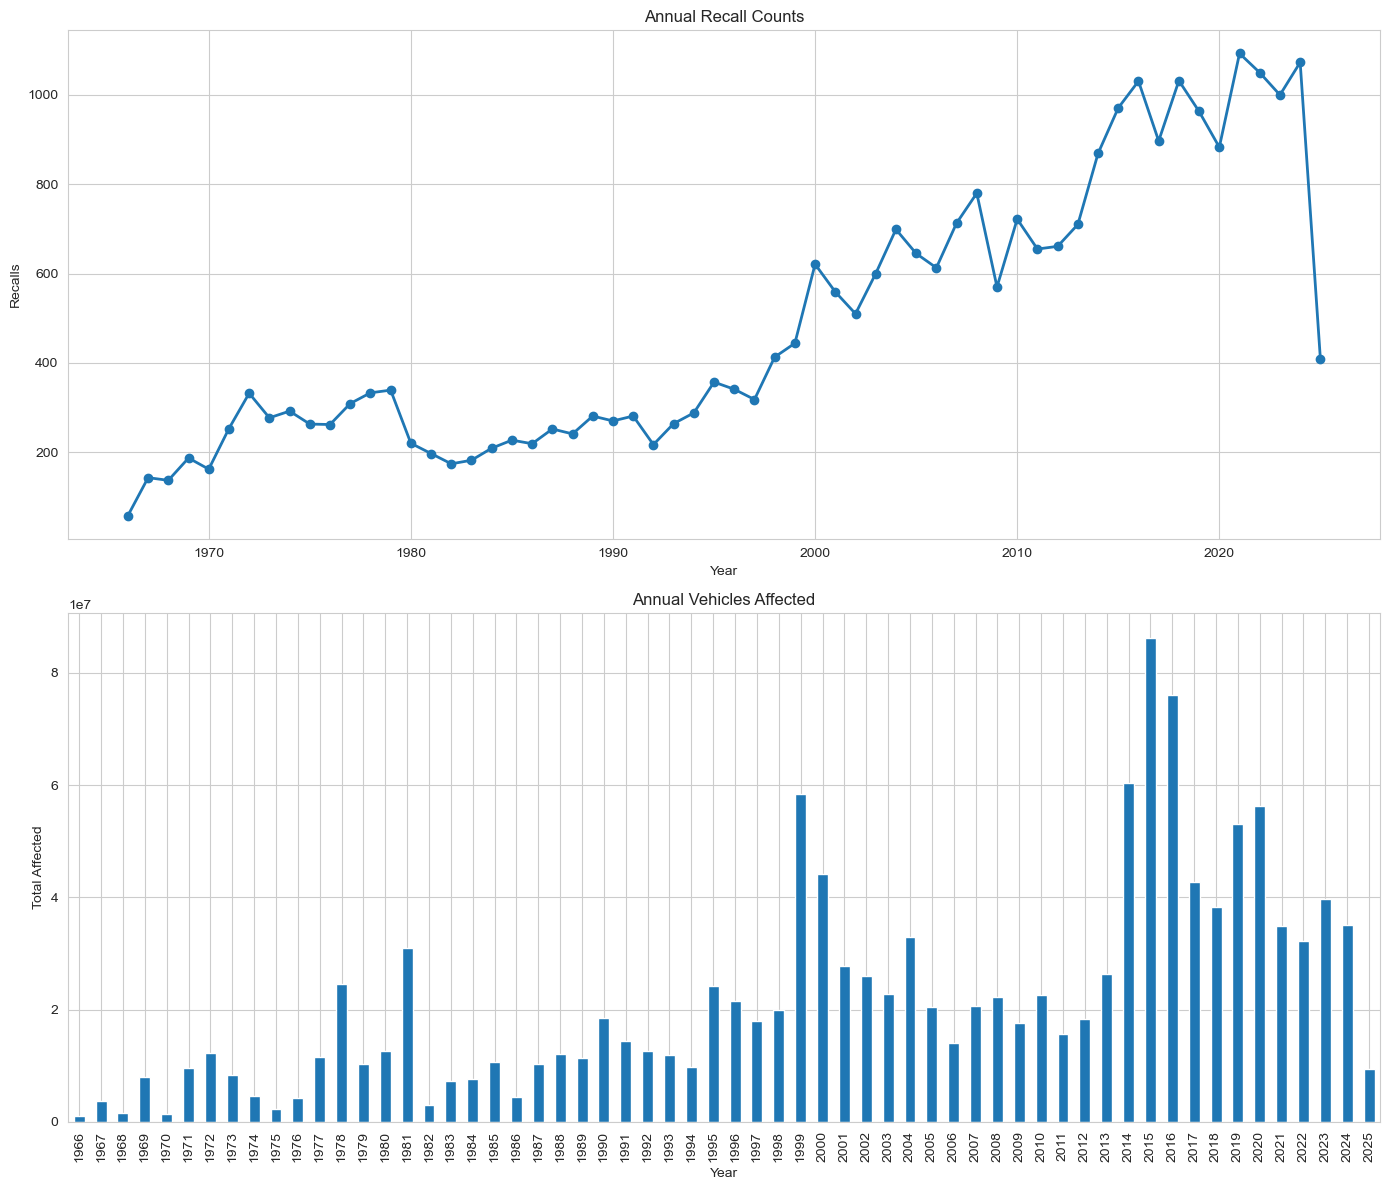


TOP 5 MANUFACTURERS BY VEHICLES AFFECTED
  Ford: 214,363,110 vehicles
  General Motors: 204,600,236 vehicles
  Stellantis: 143,329,037 vehicles
  Takata (TK Global, LLC): 87,467,531 vehicles
  Honda Motor Co.: 79,852,167 vehicles


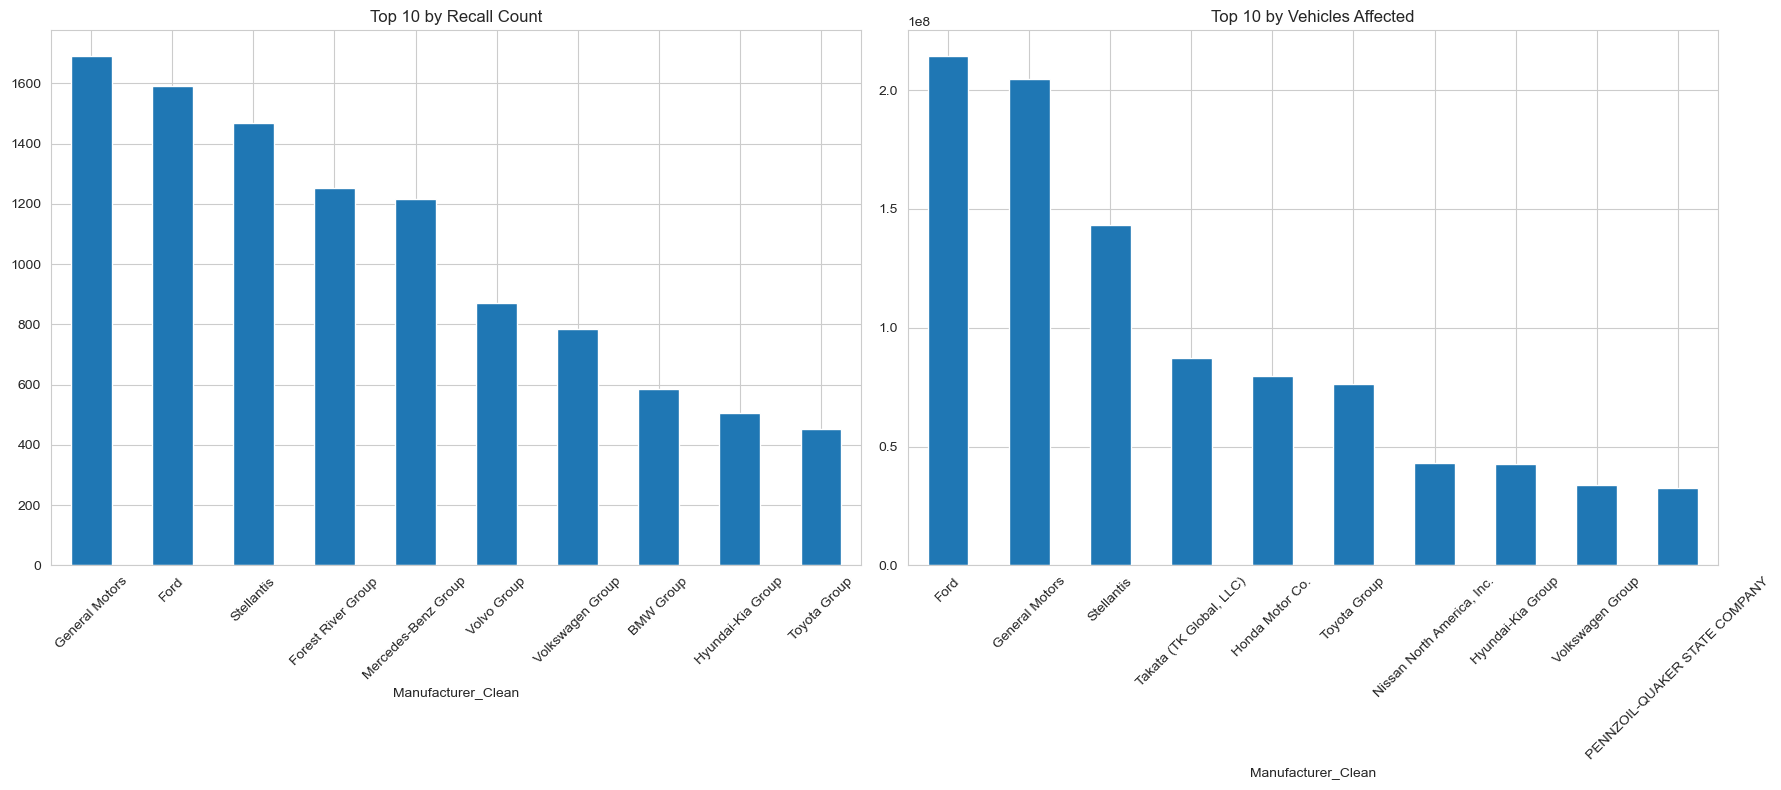


TOP 5 ISSUE CATEGORIES
  Other: 20,622 recalls
  Brake System: 2,100 recalls
  Safety Restraint: 1,523 recalls
  Electrical System: 1,362 recalls
  Steering: 1,296 recalls

TOP 5 CRITICAL ISSUE CATEGORIES
  Other: 85 critical recalls
  Safety Restraint: 34 critical recalls
  Steering: 17 critical recalls
  Brake System: 13 critical recalls
  Battery/Fire Risk: 8 critical recalls


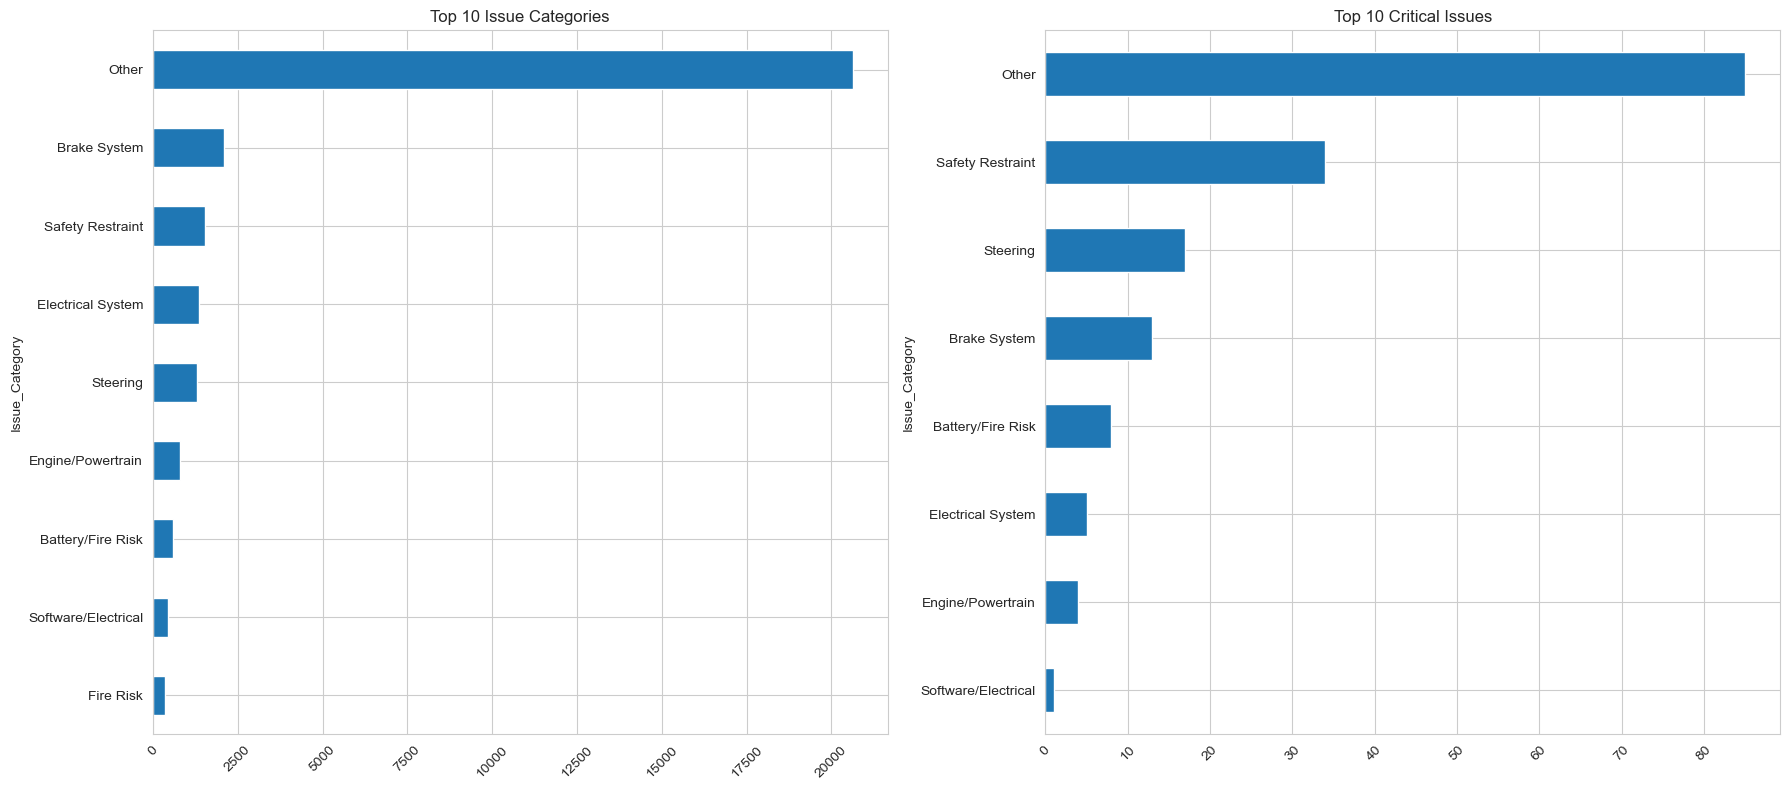

In [8]:
# ─────── Manufacturer Comparison ───────
def plot_and_report_manufacturer_comparison(df):
    _print_section("top 5 manufacturers by vehicles affected")
    tot_aff = df.groupby("Manufacturer_Clean")["Potentially Affected"].sum().nlargest(5)
    _print_top(tot_aff, "vehicles")

    fig, ax = plt.subplots(1, 2, figsize=(18, 8))
    _bar(df["Manufacturer_Clean"].value_counts().head(10), ax[0], "Top 10 by Recall Count")
    _bar(df.groupby("Manufacturer_Clean")["Potentially Affected"].sum().nlargest(10),
         ax[1], "Top 10 by Vehicles Affected")
    fig.tight_layout()
    plt.show()

# ─────── Issue Analysis ───────
def plot_and_report_issue_analysis(df):
    _print_section("top 5 issue categories")
    _print_top(df["Issue_Category"].value_counts(), "recalls")

    _print_section("top 5 critical issue categories")
    crit = df[df["Critical_Recall"] == 1]["Issue_Category"].value_counts()
    _print_top(crit, "critical recalls")

    fig, ax = plt.subplots(1, 2, figsize=(18, 8))
    _bar(df["Issue_Category"].value_counts().head(10)[::-1], ax[0],
         "Top 10 Issue Categories", kind="barh")
    _bar(crit.head(10)[::-1], ax[1],
         "Top 10 Critical Issues", kind="barh")
    fig.tight_layout()
    plt.show()

# ─────── Run All Plots ───────
plot_and_report_overall(cleaned_df)
plot_and_report_manufacturer_comparison(cleaned_df)
plot_and_report_issue_analysis(cleaned_df)


In [9]:
# ─────── Generate summary report data for one manufacturer ───────
def generate_manufacturer_report(manufacturer, df):
    """
    Collect recall stats and sample entries for a given manufacturer.
    Returns None if no data.
    """
    sub = df[df['Manufacturer_Clean'] == manufacturer]
    if sub.empty:
        return None

    # Basic counts and date range
    total_recalls    = len(sub)
    total_vehicles   = int(sub['Potentially Affected'].sum())
    critical_recalls = int(sub['Critical_Recall'].sum())
    first_year       = int(sub['Year'].min())
    last_year        = int(sub['Year'].max())

    # Yearly trends
    recall_trend   = sub.groupby('Year').size().to_dict()
    affected_trend = sub.groupby('Year')['Potentially Affected'] \
                        .sum().astype(int).to_dict()

    # Top categories and counts
    top_issues        = sub['Issue_Category'].value_counts().head(5).to_dict()
    common_components = sub['Component'].value_counts().head(5).to_dict()
    vehicle_types     = sub['Vehicle_Type'].value_counts().to_dict()

    # Sample top 3 severe recalls
    severe = sub.sort_values(
        ['Critical_Recall','Potentially Affected'],
        ascending=False
    ).head(3)

    examples = []
    for _, row in severe.iterrows():
        examples.append({
            'year':        int(row['Year']),
            'nhtsa_id':    row['NHTSA ID'],
            'component':   row['Component'],
            'affected':    int(row['Potentially Affected']),
            'description': row['Recall Description'][:200] + '...',  # short desc
            'consequence': row.get('Consequence Summary', ''),
            'critical':    'Yes' if row['Critical_Recall'] else 'No'
        })

    return {
        'manufacturer':            manufacturer,
        'total_recalls':           total_recalls,
        'total_vehicles_affected': total_vehicles,
        'critical_recalls':        critical_recalls,
        'first_recall_year':       first_year,
        'last_recall_year':        last_year,
        'recall_trend':            recall_trend,
        'affected_trend':          affected_trend,
        'top_issues':              top_issues,
        'common_components':       common_components,
        'vehicle_types':           vehicle_types,
        'recall_examples':         examples
    }

In [10]:
# ─────── Plot recall history for one manufacturer ───────
def plot_manufacturer_history(report):
    """
    Display recall counts and vehicles affected over time.
    """
    years    = sorted(report['recall_trend'])
    recalls  = [report['recall_trend'][y]   for y in years]
    affected = [report['affected_trend'][y] for y in years]

    fig, ax = plt.subplots(2, 1, figsize=(14, 12))

    # Recalls over years
    ax[0].plot(years, recalls, marker='o')
    ax[0].set_title(
        f"{report['manufacturer']} Recalls "
        f"({report['first_recall_year']}–{report['last_recall_year']})"
    )
    ax[0].set_ylabel('Count')
    ax[0].grid(True, linestyle='--', alpha=0.5)

    # Vehicles affected over years
    ax[1].bar(years, affected)
    ax[1].set_title(f"{report['manufacturer']} Vehicles Affected")
    ax[1].set_ylabel('Count')

    plt.tight_layout()
    plt.show()



=== Ford Recall Report ===
Total recalls         : 1590 (1966–2025)
Vehicles affected     : 214,363,110
Critical recalls      : 19

Top 5 issue categories:
  • Other: 1089
  • Safety Restraint: 126
  • Brake System: 111
  • Electrical System: 68
  • Steering: 62

Top 5 components:
  • FUEL SYSTEM, GASOLINE: 165
  • POWER TRAIN: 155
  • ELECTRICAL SYSTEM: 123
  • SERVICE BRAKES, HYDRAULIC: 120
  • STEERING: 92

Vehicle-type breakdown:
  • Other: 1437
  • Electric Vehicle: 77
  • RV/Trailer: 57
  • Passenger Car: 15
  • Bus: 2
  • Truck: 2

Most severe recalls:
  [2016] ID 16V384000 – AIR BAGS
      Affected : 1,892,343  |  Critical: Yes
      Ford Motor Company (Ford) is recalling certain model year 2007-2011 Ford Ranger vehicles, 2006-2011 Ford Fusion, Mercury Milan and Lincoln Zephyr/MKZ vehicles, 2007-2010 Ford Edge, Lincoln MKX vehicle...
      Consequence: An inflator rupture may result in metal fragments striking the vehicle occupants resulting in serious injury or death.

  [201

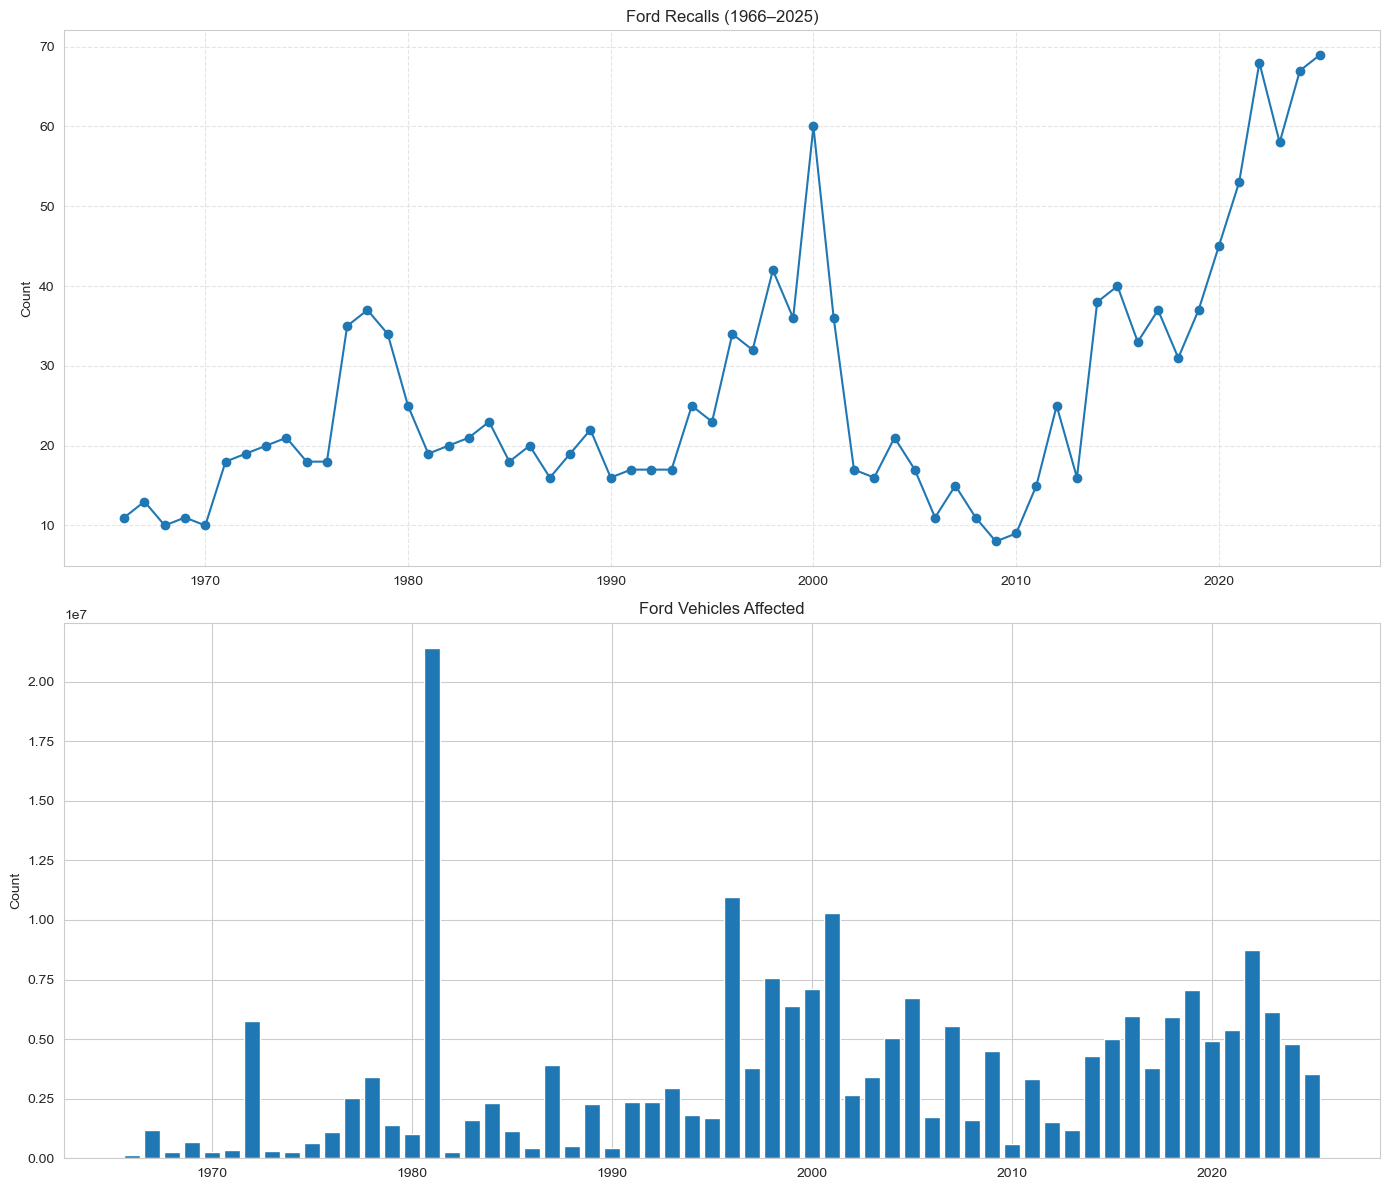

In [11]:
# ─────── Display summary and plot for a single manufacturer ───────
def display_manufacturer_summary(maker: str, df: pd.DataFrame) -> None:
    """
    Print key recall metrics for `maker` and show trend chart.
    """
    report = generate_manufacturer_report(maker, df)
    if report is None:
        print(f"No data for '{maker}'.")
        return

    # 1. Headline metrics
    print(f"\n=== {maker} Recall Report ===")
    print(f"Total recalls         : {report['total_recalls']} "
          f"({report['first_recall_year']}–{report['last_recall_year']})")
    print(f"Vehicles affected     : {report['total_vehicles_affected']:,}")
    print(f"Critical recalls      : {report['critical_recalls']}\n")

    # 2. Breakdown by category, component, and vehicle type
    def _print_dict(title: str, data: dict):
        print(title)
        for item, count in data.items():
            print(f"  • {item}: {count}")
        print()

    _print_dict("Top 5 issue categories:", report['top_issues'])
    _print_dict("Top 5 components:", report['common_components'])
    _print_dict("Vehicle-type breakdown:", report['vehicle_types'])

    # 3. Sample of most severe recalls
    print("Most severe recalls:")
    for ex in report['recall_examples']:
        print(f"  [{ex['year']}] ID {ex['nhtsa_id']} – {ex['component']}")
        print(f"      Affected : {ex['affected']:,}  |  Critical: {ex['critical']}")
        print(f"      {ex['description']}")
        if ex['consequence']:
            print(f"      Consequence: {ex['consequence']}")
        print()

    # 4. Plot recall trends
    plot_manufacturer_history(report)
display_manufacturer_summary('Ford', cleaned_df)


=== Stellantis Recall Report ===
Total recalls         : 1469 (1966–2025)
Vehicles affected     : 143,329,037
Critical recalls      : 3

Top 5 issue categories:
  • Other: 982
  • Safety Restraint: 119
  • Brake System: 100
  • Electrical System: 68
  • Steering: 65

Top 5 components:
  • SERVICE BRAKES, HYDRAULIC: 171
  • POWER TRAIN: 134
  • ELECTRICAL SYSTEM: 121
  • STEERING: 106
  • FUEL SYSTEM, GASOLINE: 86

Vehicle-type breakdown:
  • Other: 1332
  • Electric Vehicle: 64
  • RV/Trailer: 52
  • Passenger Car: 17
  • Bus: 2
  • Truck: 2

Most severe recalls:
  [2015] ID 15V312000 – AIR BAGS
      Affected : 385,686  |  Critical: Yes
      Chrysler (FCA US LLC) is recalling certain model year 2003 Dodge Ram 1500, 2500, and 3500 trucks manufactured August 29, 2002, to July 25, 2003 to address a safety defect in the passenger side frontal...
      Consequence: In the event of a crash necessitating deployment of the passengers frontal air bag, the inflator could rupture with metal f

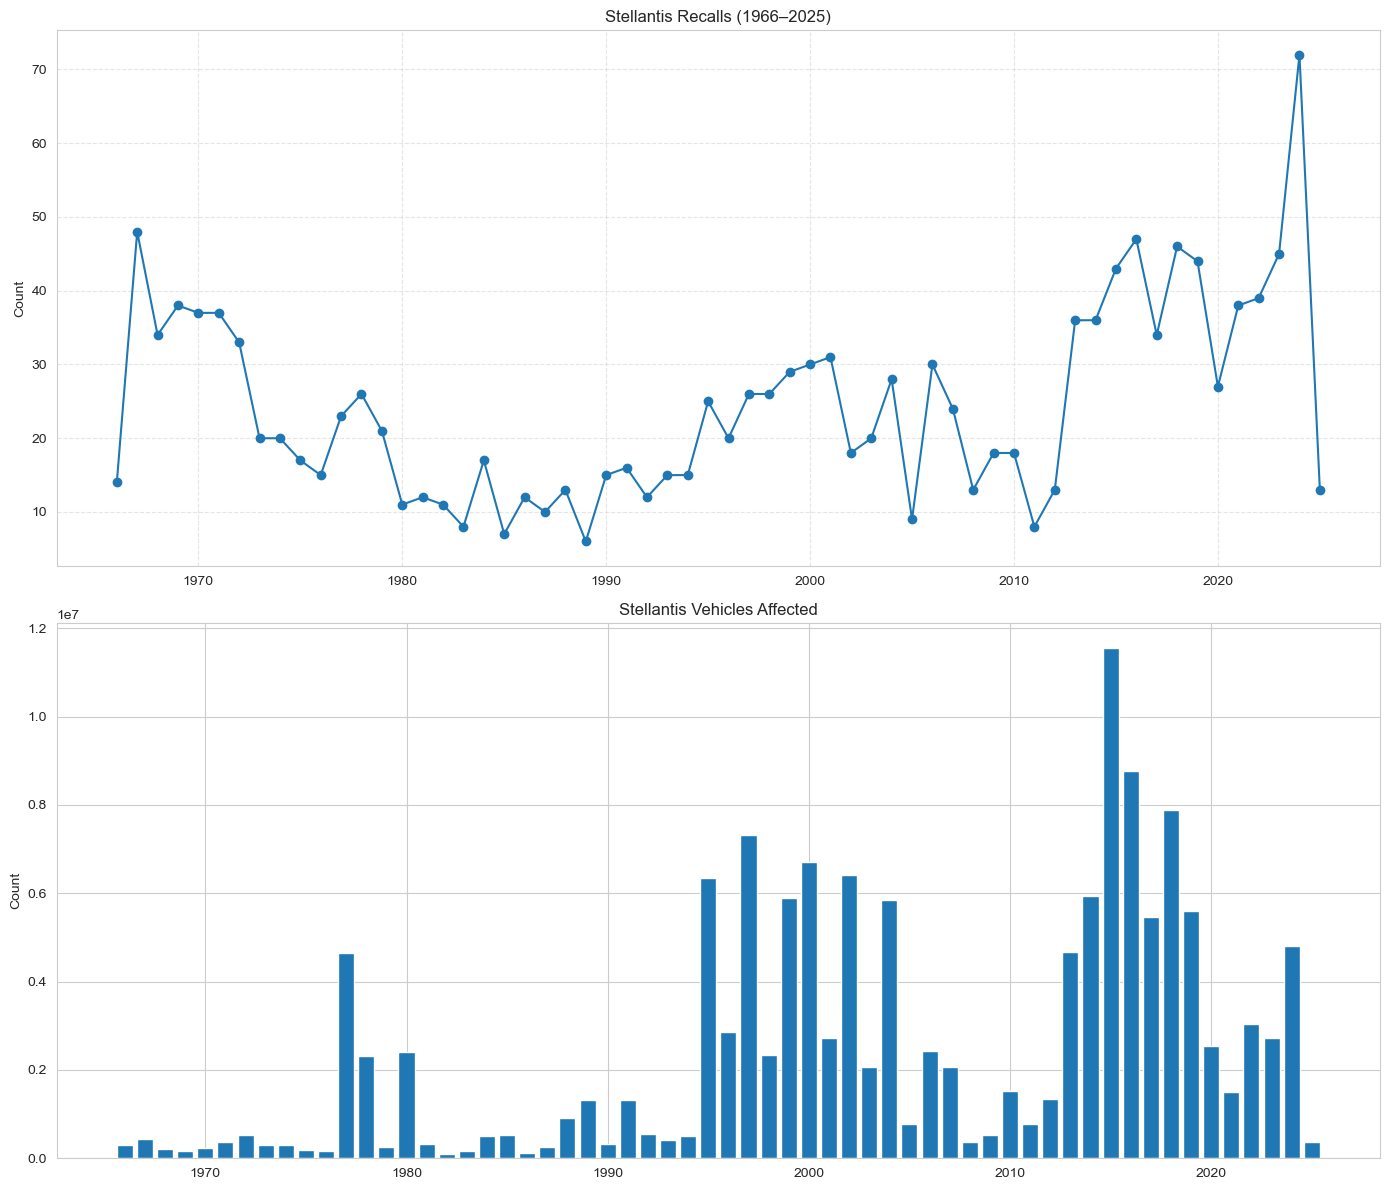

In [12]:
display_manufacturer_summary('Stellantis', cleaned_df)

In [13]:
df["Manufacturer_Clean"].value_counts()

Manufacturer_Clean
General Motors                   1691
Ford                             1590
Stellantis                       1469
Forest River Group               1252
Mercedes-Benz Group              1217
                                 ... 
Butler Trailer Mfg. Co., Inc.       1
TIGER TRAILERS, INC.                1
ELITE TRAILERS, INC.                1
J & R AUTO UPHOLSTERY SHOPPE        1
ULTRA, INC.                         1
Name: count, Length: 2998, dtype: int64


=== General Motors Recall Report ===
Total recalls         : 1691 (1966–2025)
Vehicles affected     : 204,600,236
Critical recalls      : 4

Top 5 issue categories:
  • Other: 1091
  • Safety Restraint: 177
  • Brake System: 164
  • Steering: 101
  • Electrical System: 66

Top 5 components:
  • SERVICE BRAKES, HYDRAULIC: 187
  • STEERING: 151
  • FUEL SYSTEM, GASOLINE: 121
  • POWER TRAIN: 111
  • ELECTRICAL SYSTEM: 107

Vehicle-type breakdown:
  • Other: 1576
  • Electric Vehicle: 84
  • RV/Trailer: 20
  • Passenger Car: 10
  • Truck: 1

Most severe recalls:
  [2021] ID 21V473000 – SUSPENSION
      Affected : 380,498  |  Critical: Yes
      General Motors, LLC (GM) is recalling certain 2010-2016 Cadillac SRX and 2011-2012 Saab 9-4X vehicles.  The rear suspension toe link adjuster may not have been tightened properly, which could result i...
      Consequence: A loose toe link can separate and cause a loss of vehicle control, increasing the risk of a crash.

  [2016] ID 16V256000 – SU

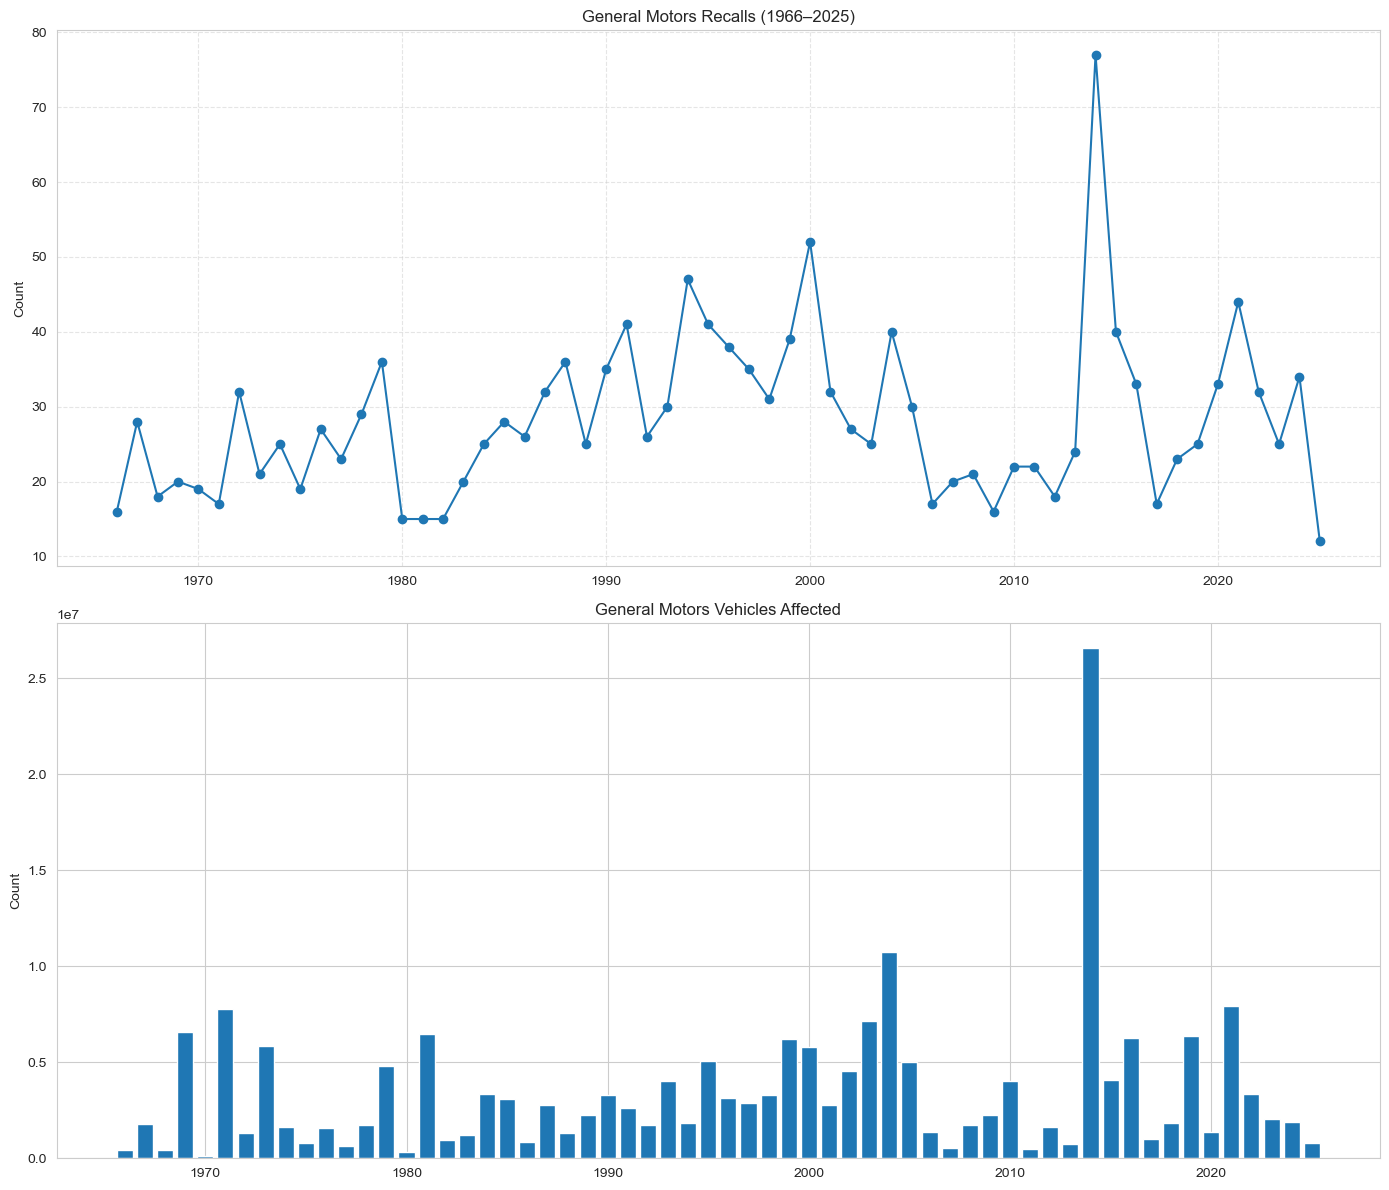

In [14]:
display_manufacturer_summary('General Motors', cleaned_df)